### grammar

1. from pCFG, can
    0. determine if a list of terminals is valid
    1. generate next terminals from list of terminals
        2. provide log-likelihood
        
2. Stores
    1. POS => [word]
    2. CFG or transition rule to generate allowed sentences
    
    


### what makes an enemy?
1. Vocab (POS => [word])
2. Grammar (set of allowed [POS])
3. Choice function?
    1. can use the Score function on many retorts, and pick one in a score range based on difficulty
    2. can use some similarity-based weights
    
wrap up functionality in a reply(self, Score, remark_history)

### what does Player do?
all player does right now is complete phrases and manage loaded words


1. model -> user choice -> model, excluding small transitions in Elm
2. provides additional view functionality??
    1. suggestions

** this combines Rules and Player state ** 

### get new system working with LocalEncounter(GameMaster)

automatic conversion between namedtuple and dict would be nice
ask for retort when phrase finishes (signal from Elm, double space)


### generate dec insults using a CFG
- parameterize by production damping coefficient
 

In [2]:
import cmpd_web
reload(cmpd_web)
from cmpd_web import Player, LocalGameMaster

grammar = cmpd_web.load_grammar('DIDB', column_regex='start')
player = Player(grammar)

gm = LocalGameMaster(player)

gm.load_html('resources/harlowe/Nixonland_Archive_5.html')
from IPython.display import clear_output, display, HTML, Image
clear_output()

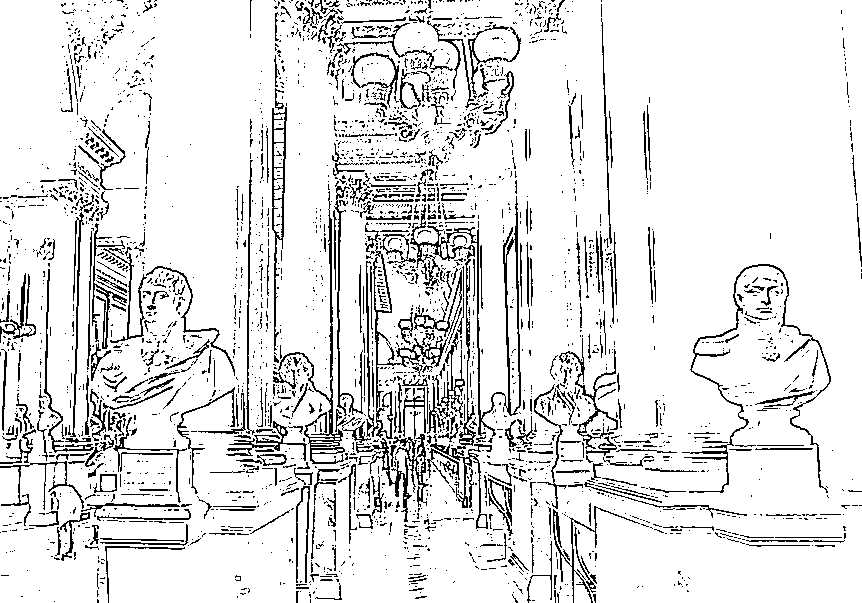

Current map: Gallery of Heroes
Go to
n | January 9, 1913 - April 22, 1994
e | March 20, 1925 - February 14, 1999
c | October 16, 1931 - April 21, 2012
h | October 27, 1926 - November 12, 1993



In [10]:
gm.initialize()

In [326]:
reload(cmpd_web)

vocab = cmpd_web.load_vocab('derp')
grammar = None
player = cmpd_web.Player(vocab, grammar)


LE = cmpd_web.LocalEncounter(player)

LE.prompt('ctenophora')

Wordbank: Lazy, Stupid, Insecure, Idiotic, ...
Enemy: ctenophora
Enter text to insult, enter nothing to quit.
a
Wordbank: Douche, Ass, Turd, Butt, ...
b
Wordbank: Pilot, Captain, Pirate, Knob, ...
c
#################################################
# [--------------------------                 ] #
# Lazy Butt Captain (0.10)                      #
#                         Fear-Mongering Coward #
#################################################
Wordbank: Lazy, Stupid, Insecure, Idiotic, ...
a
Wordbank: Douche, Ass, Turd, Butt, ...
b
Wordbank: Pilot, Captain, Pirate, Knob, ...
c
#################################################
# [------------------------                   ] #
# Lazy Butt Captain (-0.05)                     #
#                             Litigious Upstart #
#################################################
Wordbank: Lazy, Stupid, Insecure, Idiotic, ...


KeyboardInterrupt: 

In [21]:
from external import cfg
terminals = cfg.get_terminals(gm.player.grammar)

In [22]:
terminals

[('Back', 'Place'),
 ('Beyond', 'Place'),
 ('Candy-Assed', 'A'),
 ('Clamorous', 'A'),
 ('Constipated', 'A'),
 ('Creature', 'N'),
 ('Despicable', 'A'),
 ('Dwarves', 'NPL'),
 ('Earth', 'Place'),
 ('Family', 'Group'),
 ('Hollow', 'Place'),
 ('Junta', 'Group'),
 ('Liars', 'NPL'),
 ('Mouth-Breather', 'N'),
 ('One-Horse', 'Place'),
 ('Racist', 'N'),
 ('Rapists', 'NPL'),
 ('Syndicate', 'Group'),
 ('Town', 'Place'),
 ('Tufted', 'A'),
 ('Weasel', 'N'),
 ('Yokel', 'N'),
 ('a', 'Group'),
 ('a', 'Place'),
 ('born', 'PP'),
 ('by', 'PP'),
 ('employed', 'PP'),
 ('for', 'PP'),
 ('from', 'PP'),
 ('into', 'PP'),
 ('of', 'Group'),
 ('of', 'Place'),
 ('the', 'Place')]

In [17]:
def print_grammophone(grammar, start):
    """http://mdaines.github.io/grammophone/
    """

for LHS, symbol_chains in gm.player.grammar.items():
    for sc in symbol_chains:
        print LHS, '->', sc, '.'

A -> Candy-Assed .
A -> Clamorous .
A -> Constipated .
A -> Despicable .
A -> Tufted .
NPL -> A NPL .
NPL -> Dwarves .
NPL -> Liars .
NPL -> Rapists .
PP -> born into Group .
PP -> employed by Group .
PP -> for Group .
PP -> from Place .
Group -> a Family of NPL .
Group -> a Junta of NPL .
Group -> a Syndicate of NPL .
N -> A N .
N -> Creature .
N -> Mouth-Breather .
N -> Racist .
N -> Weasel .
N -> Yokel .
S -> N .
S -> N PP .
Place -> a One-Horse Town .
Place -> the Back of Beyond .
Place -> the Hollow Earth .


In [284]:
LE.player_phrase

[Word(word=u'Lazy', partOfSpeech=u'Asshole', tag=''),
 Word(word=u'Douche', partOfSpeech=u'Butt', tag=''),
 Word(word=u'Pilot', partOfSpeech=u'Cock', tag=''),
 Word(word=u'Elitist', partOfSpeech=u'Asshole', tag='')]

In [11]:
from nltk.parse.generate import generate, demo_grammar

In [11]:
demo_grammar = """
S -> NP VPxz
NP -> Det N
PP -> P NP
VP -> 'slept' | 'saw' NP | 'walked' PP
Det -> 'the' | 'a'
N -> 'man' | 'park' | 'dog'
P -> 'in' | 'with'
"""

In [13]:
dir(grammar)

['__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__module__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_all_unary_are_lexical',
 '_calculate_grammar_forms',
 '_calculate_indexes',
 '_calculate_leftcorners',
 '_categories',
 '_empty_index',
 '_immediate_leftcorner_categories',
 '_immediate_leftcorner_words',
 '_is_lexical',
 '_is_nonlexical',
 '_leftcorner_parents',
 '_leftcorner_words',
 '_leftcorners',
 '_lexical_index',
 '_lhs_index',
 '_max_len',
 '_min_len',
 '_productions',
 '_rhs_index',
 '_start',
 'check_coverage',
 'fromstring',
 'is_binarised',
 'is_chomsky_normal_form',
 'is_flexible_chomsky_normal_form',
 'is_leftcorner',
 'is_lexical',
 'is_nonempty',
 'is_nonlexical',
 'leftcorner_parents',
 'leftcorners',
 'max_len',
 'min_len',
 'productions',
 'start',
 'unicode_repr']

In [12]:
from nltk import CFG
grammar = CFG.fromstring(demo_grammar)
print(grammar)

Grammar with 13 productions (start state = S)
    S -> NP VPxz
    NP -> Det N
    PP -> P NP
    VP -> 'slept'
    VP -> 'saw' NP
    VP -> 'walked' PP
    Det -> 'the'
    Det -> 'a'
    N -> 'man'
    N -> 'park'
    N -> 'dog'
    P -> 'in'
    P -> 'with'


In [10]:
# make a CFG for dec
from spacy.en import English
nlp = English()
doc = nlp(u'A whole document.\nNo preprocessing require.   Robust to arbitrary formating.')
for sent in doc:
    for token in sent:
        if token.is_alpha:
            print token.orth_, token.tag_, token.head.lemma_

RuntimeError: Model 'en>=1.1.0,<1.2.0' not installed. Please run 'python -m spacy.en.download' to install latest compatible model.

In [6]:
import spacy

### load dec vocab and text

In [177]:
dec_vocab = cmpd_web.load_vocab('dec', reload=True)
dec_keywords = [w.lower() for s, words in dec_vocab[:2] for w in words]
adj = dec_vocab[0][1]
noun = dec_vocab[1][1]

In [178]:
dec_text = open('resources/dec_all').read()
dec_text = dec_text.lower().translate(None, '?.",-()\xe2\x80\x9d\x9c:!\t;')
dec_text = dec_text.replace('\n', ' ')
dec_text = dec_text.replace('play boy', 'playboy')
open('resources/dec_text', 'w').write(dec_text)

In [185]:
# bigram model
df_dec = pd.DataFrame(columns=dec_keywords, index=dec_keywords)
df_dec[:] = 0.0001

# deal with split words
tmp = str(dec_text)
for w in dec_keywords:
    tmp = tmp.replace(w, w.replace(' ', '_'))

tmp = tmp.split()
dec_bigrams = []
for w1, w2 in zip(tmp[:-1], tmp[1:]):
    w1 = w1.replace('_', ' ')
    w2 = w2.replace('_', ' ')
    if w1 in dec_keywords and w2 in dec_keywords:
        df_dec.loc[w1, w2] += 1

dec_counts = [[w, df_dec.loc[w].sum() + df_dec.loc[:,w].sum(), dec_text.split().count(w)] for w in dec_keywords]        

# normalize rows
df_dec = df_dec.div(df_dec.sum(axis=1), axis=0)

In [180]:
def next_word(w):
    s = df_dec.loc[w]
    return s.sample(weights=s).index[0]
#     return s.sample().index[0]

def prev_word(w):
    s = df_dec.loc[:,w]
    return s.sample(weights=s).index[0]

In [191]:
def make_phrase_fwd(start=None):
    if start:
        arr = [start]
    else:
        arr = [np.random.choice(adj)]
    while True:
        word = next_word(arr[-1])
        if word.lower() in noun:
            arr += [word]
            break
        elif word.lower() in arr:
            continue
        else:
            arr += [word]

    return ' '.join(arr).upper()

def make_phrase_rev():
    arr = [np.random.choice(noun)]
    while True:
        word = prev_word(arr[-1])
        if word.lower() in noun:
            break
        else:
            arr += [word]

    return ' '.join(arr[::-1]).upper()

dec_phrases = []
for a in adj:
    for _ in range(10):
        phrase = make_phrase_fwd(a)
        if len(phrase.split()) > 3:
            dec_phrases += [phrase]
            break

,0,1,2,3
18,programmed,0.0088,1,113.636364
16,new,1.0088,24,23.790642
17,degenerative,1.0088,11,10.904044
15,secret,7.0088,44,6.277822
35,police,3.0088,15,4.985376
36,judges,3.0088,14,4.653018
33,communism,2.0088,8,3.982477
21,menial,2.0088,7,3.484667


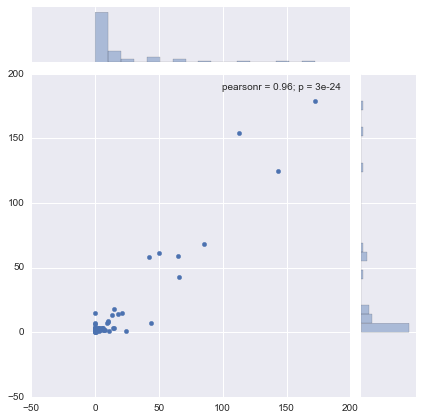

In [186]:
df = pd.DataFrame(dec_counts)

df[3] = df[2]/df[1]



data = np.array(dec_counts)
sns.jointplot(data[:,2].astype(float), data[:,1].astype(float))
df.sort_values(3)[::-1].head(8)

In [196]:
g = CFG.fromstring("""

S -> '-' FN | FN
FN -> DL | DL '.' DL

DL -> D | D DL

D -> '0' | '1' | '2'

""")

In [208]:
grammar2 = CFG.fromstring("""
  S  -> NP VP
  NP -> Det Nom | PropN
  Nom -> Adj Nom | N
  VP -> V Adj | V NP | V S | V NP PP
  PP -> P NP
  PropN -> 'Buster' | 'Chatterer' | 'Joe'
  Det -> 'the' | 'a'
  N -> 'bear' | 'squirrel' | 'tree' | 'fish' | 'log'
  Adj  -> 'angry' | 'frightened' |  'little' | 'tall'
  V ->  'chased'  | 'saw' | 'said' | 'thought' | 'was' | 'put'
  P -> 'on'
  """)

In [224]:
g = CFG.fromstring("""

S -> '-' FN | FN
FN -> DL | DL '.' DL

DL -> D | D DL

D -> '0' | '1' | '2'

""")

In [225]:
gen = generate(g, depth=7)
[str(''.join(x)) for x in gen]

['-0',
 '-1',
 '-2',
 '-00',
 '-01',
 '-02',
 '-000',
 '-001',
 '-002',
 '-010',
 '-011',
 '-012',
 '-020',
 '-021',
 '-022',
 '-10',
 '-11',
 '-12',
 '-100',
 '-101',
 '-102',
 '-110',
 '-111',
 '-112',
 '-120',
 '-121',
 '-122',
 '-20',
 '-21',
 '-22',
 '-200',
 '-201',
 '-202',
 '-210',
 '-211',
 '-212',
 '-220',
 '-221',
 '-222',
 '-0.0',
 '-0.1',
 '-0.2',
 '-0.00',
 '-0.01',
 '-0.02',
 '-0.000',
 '-0.001',
 '-0.002',
 '-0.010',
 '-0.011',
 '-0.012',
 '-0.020',
 '-0.021',
 '-0.022',
 '-0.10',
 '-0.11',
 '-0.12',
 '-0.100',
 '-0.101',
 '-0.102',
 '-0.110',
 '-0.111',
 '-0.112',
 '-0.120',
 '-0.121',
 '-0.122',
 '-0.20',
 '-0.21',
 '-0.22',
 '-0.200',
 '-0.201',
 '-0.202',
 '-0.210',
 '-0.211',
 '-0.212',
 '-0.220',
 '-0.221',
 '-0.222',
 '-1.0',
 '-1.1',
 '-1.2',
 '-1.00',
 '-1.01',
 '-1.02',
 '-1.000',
 '-1.001',
 '-1.002',
 '-1.010',
 '-1.011',
 '-1.012',
 '-1.020',
 '-1.021',
 '-1.022',
 '-1.10',
 '-1.11',
 '-1.12',
 '-1.100',
 '-1.101',
 '-1.102',
 '-1.110',
 '-1.111',
 '-1.112'

In [198]:
from nltk.parse.generate import generate, demo_grammar

In [193]:
Grammars can be parsed from strings:

>>> from nltk import CFG
>>> grammar = CFG.fromstring("""
... S -> NP VP
... PP -> P NP
... NP -> Det N | NP PP
... VP -> V NP | VP PP
... Det -> 'a' | 'the'
... N -> 'dog' | 'cat'
... V -> 'chased' | 'sat'
... P -> 'on' | 'in'
... """)
>>> grammar
<Grammar with 14 productions>
>>> grammar.start()
S
>>> grammar.productions() # doctest: +NORMALIZE_WHITESPACE
[S -> NP VP, PP -> P NP, NP -> Det N, NP -> NP PP, VP -> V NP, VP -> VP PP,
Det -> 'a', Det -> 'the', N -> 'dog', N -> 'cat', V -> 'chased', V -> 'sat',
P -> 'on', P -> 'in']
Probabilistic CFGs:

>>> from nltk import PCFG
>>> toy_pcfg1 = PCFG.fromstring("""
... S -> NP VP [1.0]
... NP -> Det N [0.5] | NP PP [0.25] | 'John' [0.1] | 'I' [0.15]
... Det -> 'the' [0.8] | 'my' [0.2]
... N -> 'man' [0.5] | 'telescope' [0.5]
... VP -> VP PP [0.1] | V NP [0.7] | V [0.2]
... V -> 'ate' [0.35] | 'saw' [0.65]
... PP -> P NP [1.0]
... P -> 'with' [0.61] | 'under' [0.39]
... """)
Chomsky Normal Form grammar (Test for bug 474)

>>> g = CFG.fromstring("VP^<TOP> -> VBP NP^<VP-TOP>")
>>> g.productions()[0].lhs()
VP^<TOP>

nltk.grammar.CFG

In [192]:
# with weights
for p in sorted(dec_phrases):
    if len(p.split()) > 3:
        print p

BRAZEN DEADLY COMMUNIST PUPPET GANGSTER COMPUTER
CIA DEADLY FRANKENSTEIN LIVING DEATH
COMMUNIST GANGSTER POLICE STATE
CONSPIRATORIAL GANGSTER CON ARTIST
DEADLY COMMUNIST GANGSTER POLICE
DEGENERATIVE MAD DEADLY GANGSTER POLICE
GANGSTER COMMUNIST POLICE STATE
GUINEA PIG COMMUNIST PUPPET GANGSTER COMPUTER
INSTANT COMMUNIST GANGSTER FRANKENSTEIN CONTROLS
LOW DEADLY SNEAK CON ARTIST
MAD DEADLY GANGSTER POLICE
MAFIONIC DEADLY GANGSTER CIA UNDERLINGS
MONGREL GANGSTER CIA UNDERLINGS
NEW PARROTING PUPPET UNDERLINGS
PARROTING PUPPET GANGSTER FRANKENSTEIN LIVING DEATH
PROGRAMMED MAD DEADLY GANGSTER FRANKENSTEIN CONTROLS
PUPPET GANGSTER PARROTING SPY CAMERAS
SECRET DEADLY GANGSTER COMPUTER
SNEAK DEADLY GANGSTER POLICE
STRATIFIED DEADLY GANGSTER COMPUTER
SYSTEMATIC INSTANT PLASTIC SURGERY
WALL TO WALL DEADLY SNEAK GANGSTER COMPUTER
WORLD-WIDE PROGRAMMED FRANKENSTEIN LIVING DEATH


In [170]:
# without weights
[p for p in dec_phrases if len(p.split())>3]

['WALL TO WALL ASSASSINS',
 'SNEAK FRANKENSTEIN BRAZEN COMMUNISM',
 'SNEAK FRANKENSTEIN STRATIFIED EXTERMINATION',
 'PROGRAMMED MAFIONIC CONSPIRATORIAL CIA JUDGES',
 'GUINEA PIG MONGREL UNDERLINGS',
 'FRANKENSTEIN PARROTING SECRET BUTCHERY',
 'WALL TO WALL UNDETECTABLE SPY CAMERAS',
 'INSTANT PUPPET UNDETECTABLE LOW SECRET PLAYBOY SCUM-ON-TOP',
 'MAFIONIC EARPHONE RADIO SLAVE',
 'PROGRAMMED CIA FRANKENSTEIN PARROTING JUDGES',
 'PARROTING WALL TO WALL INSTANT DEGENERATIVE MAFIONIC POLICE STATE',
 'SYSTEMATIC WORLD-WIDE CIA WALL TO WALL SNEAK COMMUNISM',
 'WORLD-WIDE SECRET CIA CON ARTIST',
 'PARROTING NEW MENIAL GUINEA PIG UNDERLINGS',
 'MENIAL BRAZEN EARPHONE RADIO SLAVE',
 'WALL TO WALL JUDGES',
 'WORLD-WIDE STRATIFIED DEGENERATIVE PUPPET UNDETECTABLE CON ARTIST',
 'GUINEA PIG NEW PLAYBOY SCUM-ON-TOP',
 'DEADLY WALL TO WALL MAD WORLD-WIDE BUTCHERY',
 'UNDETECTABLE BRAZEN GUINEA PIG GOD',
 'WALL TO WALL FRANKENSTEIN POLICE STATE',
 'MAFIONIC WALL TO WALL ORGANIZED CRIME',
 'DEADLY PUPP

In [ ]:
import cmpd_web
reload(cmpd_web)

from nltk.corpus import wordnet as wn
from cmpd_web import (DIDB_phrases, Base, LocalEncounter, VersusDIDB, load_sheet, VersusDerp)
import random
from collections import OrderedDict, Counter
from itertools import cycle, product
import difflib
import regex as re

%matplotlib inline
import seaborn as sns

In [26]:
vocab = cmpd_web.load_vocab('derp', reload=True)

LE = LocalEncounter()
LE.opponent = VersusDerp(vocab, LE.local_emit)
LE.prompt()

Enemy: <cmpd_web.VersusDerp object at 0x11a7e54d0>
Enter text to insult, enter nothing to quit.
Wordbank: Lazy, Stupid, Insecure, Idiotic, ...
lazy
Wordbank: Crotch, Ass, Nut, Cock, ...
crotch
Wordbank: Pirate, Goblin, Clown, Balloon, ...
pirate
#################################################
# [--------------------------                 ] #
# Lazy Crotch Pirate (0.10)                     #
#                               Luckless Zealot #
#################################################
Wordbank: Pompous, Ugly, Slimy, Elitist, ...


KeyboardInterrupt: 

In [106]:
pd.DataFrame(dict(*derp_categories))

TypeError: dict expected at most 1 arguments, got 3

In [102]:
derp_categories = [('A', ['Lazy',
  'Stupid',
  'Insecure',
  'Idiotic',
  'Slimy',
  'Smelly',
  'Pompous',
  'Pie-Eating',
  'Racist',
  'Elitist',
  'White Trash',
  'Drug-Loving',
  'Tone Deaf',
  'Ugly',
  'Creepy']),
 ('B', ['Douche',
  'Ass',
  'Turd',
  'Butt',
  'Cock',
  'Shit',
  'Crotch',
  'Prick',
  'Taint',
  'Fuck',
  'Dick',
  'Nut']),
 ('C', ['Pilot',
  'Captain',
  'Pirate',
  'Knob',
  'Box',
  'Jockey',
  'Nazi',
  'Waffle',
  'Goblin',
  'Blossum',
  'Clown',
  'Socket',
  'Balloon'])]

Enemy: <cmpd_web.VersusDIDB object at 0x11ba8cfd0>
Enter text to insult, enter nothing to quit.
Wordbank: Irreligious, Jaded, Predatory, Lonely, ...
jaded
Wordbank: Fop, Redneck, Hack, Pushover, ...
loser
#################################################
# [------------------------                   ] #
# Jaded Loser (0.05)                            #
#                              Subservient Wimp #
#################################################
Wordbank: Common, Careless, Clumsy, Dimwitted, ...



In [193]:
places = [(0.24, 0.12, 'w', cmpd_web.stable['ctenophora']),
          (0.19, 0.68, 'x', cmpd_web.stable['ctenophora']), 
          (0.80, 0.22, 'y', cmpd_web.stable['derp']),
          (0.74, 0.71, 'z', cmpd_web.stable['derp'])]
places = [{'x': x, 'y': y, 'label': l, 'enemy': e} for (x,y,l,e) in places]